# Etudiant

MILOUNGOU Jedidja WL Dupret Joyeux


# Importation des packages

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import random
import os

# Paludisme

Le paludisme est une maladie parasitaire potentiellement mortelle causée par une infection par un protozoaire Plasmodium transmis par un moustique anophèle femelle infectieux.

Le modèle suivant tente de distinguer les cellules infectées par le paludisme de celles qui ne le sont pas.

Répartition de ce exo :

* Chargement de l'ensemble de données : chargez les données et importez les bibliothèques.

* Prétraitement des données :
Lire les images, étiquettes stockées dans 2 dossiers (Parasitisés, Non infectés).

* Afficher les images non infectées et parasitées avec leurs étiquettes respectives.
* Normalisation des données d'image.
* Division des données en test, entrainnement et validation
d'ImageDataGenerator
* Création et formation du modèle
: créez un modèle cnn avec la bibliothèque  KERAS.

* Évaluation : affichez  les métriques d’évaluation et tracer la courbe de validation.



### Chargement des données

In [2]:
import os
import pandas as pd
import numpy as np
import cv2
import random

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

### Examinez quelques exemples de cellules parasitées et non infectées.

In [3]:
root = 'J:/Master/Semestre 2/Deep Learning/Projet/Examen_Deep_Learning_Master_Oct2023_DIT/cell_images/'
para = 'Parasitized'
uninf = 'Uninfected'
Parasitized = os.listdir(root+para)
Uninfected = os.listdir(root+uninf)

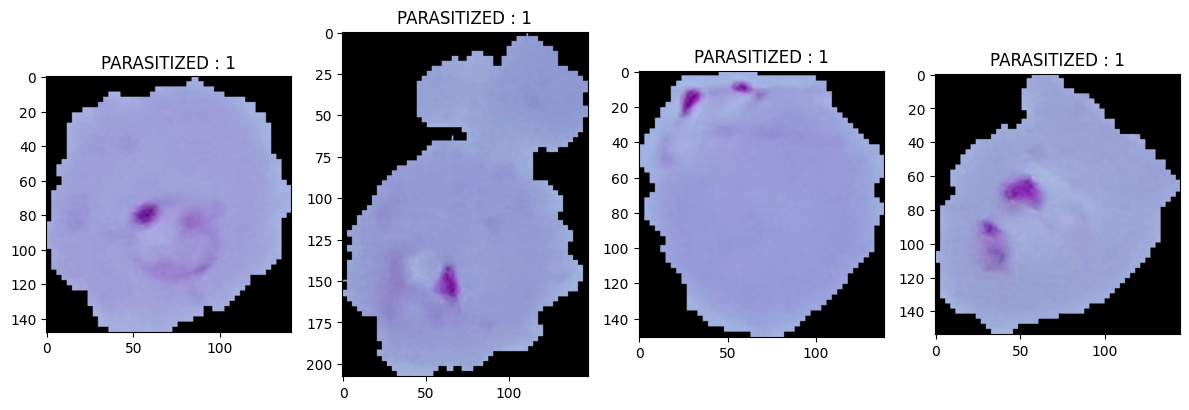

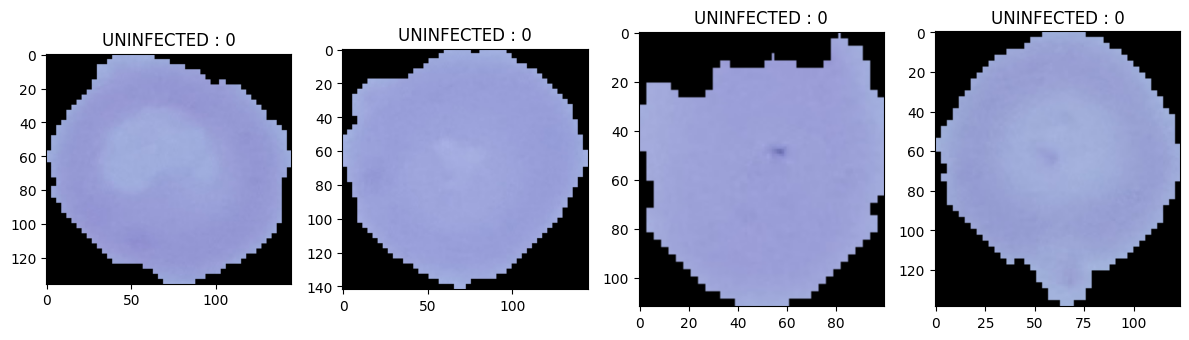

In [4]:
# Visualisation des images Parasitized
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(root+para+'/'+Parasitized[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

# Visualisation des images Uninfected
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(root+uninf+'/'+Uninfected[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

### Les images sont redimensionnées et converties en tableaux avant d'être ajoutées dans une seule liste

In [6]:
data = []
labels = []

for img in Parasitized:
    try:
        img_read = plt.imread(root + para + '/' + img)
        img_resize = cv2.resize(img_read, (64, 64))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None

for img in Uninfected:
    try:
        img_read = plt.imread(root + uninf + '/' + img)
        img_resize = cv2.resize(img_read, (64, 64))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

## Répartition de l'ensemble de données



Les données traitées et mélangées sont désormais divisées en ensembles de formation, de validation et de test.

Une répartition de 80 %-10 %-10 % est suivie


In [10]:
data = np.array(data)
labels = np.array(labels)

def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)
X_prep, y_prep = prep_dataset(data, labels)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_prep,y_prep, test_size=0.2, shuffle=True,stratify=y_prep)
X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test, test_size=0.5, stratify=Y_test)

Y_test = np.argmax(Y_test, axis=1)

# Modèle CNN

### Question 1 : Proposez une differentes approche modèle CNN  pour résoudre ce problème.

NB: l'objectif est de Proposer differentes approche pour classifier les cellule infecter et non infecter

NB: Le modèle utilise l'optimiseur Adam, la précision étant la métrique


#### Modèle CNN Basique

Ce modèle utilise des couches convolutionnelles simples avec des couches pooling et quelques couches fully connected.

In [20]:
model_cnn_basique = models.Sequential()
model_cnn_basique.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cnn_basique.add(layers.MaxPooling2D((2, 2)))
model_cnn_basique.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn_basique.add(layers.MaxPooling2D((2, 2)))
model_cnn_basique.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_cnn_basique.add(layers.MaxPooling2D((2, 2)))
model_cnn_basique.add(layers.Flatten())
model_cnn_basique.add(layers.Dense(128, activation='relu'))
model_cnn_basique.add(layers.Dense(2, activation='softmax'))

model_cnn_basique.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Modèle CNN avec Data Augmentation
Ce modèle a pour but d'utiliser la data augmentation pour augmenter la diversité des images d'entraînement

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

model_cnn_data_augmentation = models.Sequential()
model_cnn_data_augmentation.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cnn_data_augmentation.add(layers.MaxPooling2D((2, 2)))
model_cnn_data_augmentation.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn_data_augmentation.add(layers.MaxPooling2D((2, 2)))
model_cnn_data_augmentation.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_cnn_data_augmentation.add(layers.MaxPooling2D((2, 2)))
model_cnn_data_augmentation.add(layers.Flatten())
model_cnn_data_augmentation.add(layers.Dense(128, activation='relu'))
model_cnn_data_augmentation.add(layers.Dense(2, activation='softmax'))

model_cnn_data_augmentation.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Modèle CNN avec Dropout
Le modèle utilise des couches Dropout pour prévenir le surapprentissage

In [26]:
model_cnn_dropout = models.Sequential()
model_cnn_dropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cnn_dropout.add(layers.MaxPooling2D((2, 2)))
model_cnn_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn_dropout.add(layers.MaxPooling2D((2, 2)))
model_cnn_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_cnn_dropout.add(layers.MaxPooling2D((2, 2)))
model_cnn_dropout.add(layers.Flatten())
model_cnn_dropout.add(layers.Dense(128, activation='relu'))
model_cnn_dropout.add(layers.Dropout(0.5))
model_cnn_dropout.add(layers.Dense(2, activation='softmax'))

model_cnn_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Modèle CNN avec Batch Normalization
Le modèle utilise la normalisation par lot (Batch Normalization) pour accélérer et stabiliser l'entraînement.

In [32]:
model_cnn_batch_normalization = models.Sequential()
model_cnn_batch_normalization.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cnn_batch_normalization.add(layers.BatchNormalization())
model_cnn_batch_normalization.add(layers.MaxPooling2D((2, 2)))
model_cnn_batch_normalization.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn_batch_normalization.add(layers.BatchNormalization())
model_cnn_batch_normalization.add(layers.MaxPooling2D((2, 2)))
model_cnn_batch_normalization.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_cnn_batch_normalization.add(layers.BatchNormalization())
model_cnn_batch_normalization.add(layers.MaxPooling2D((2, 2)))
model_cnn_batch_normalization.add(layers.Flatten())
model_cnn_batch_normalization.add(layers.Dense(128, activation='relu'))
model_cnn_batch_normalization.add(layers.BatchNormalization())
model_cnn_batch_normalization.add(layers.Dense(2, activation='softmax'))

model_cnn_batch_normalization.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Question 2: calculer le nombre de parametre pour chaque modele proposez

In [18]:
model_cnn_basique.summary()
model_cnn_data_augmentation.summary()
model_cnn_dropout.summary()
model_cnn_batch_normalization.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,737 (2.61 MB)

 Trainable params: 684,033 (2.61 MB)

 Non-trainable params: 704 (2.75 KB)

### Question 3: Utiliser les données pour entrainner les differents modele proposer

NB : Le modèle est entraîné pendant 10 époques avec une taille de lot de 64 en utilisant la précision comme métrique

#### Entraînement du modèle CNN Basique

In [21]:
history_basique = model_cnn_basique.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 74s 197ms/step - accuracy: 0.6556 - loss: 0.5813 - val_accuracy: 0.9423 - val_loss: 0.1791
Epoch 2/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 64s 184ms/step - accuracy: 0.9525 - loss: 0.1543 - val_accuracy: 0.9452 - val_loss: 0.1684
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 75s 164ms/step - accuracy: 0.9568 - loss: 0.1303 - val_accuracy: 0.9481 - val_loss: 0.1533
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 108s 238ms/step - accuracy: 0.9594 - loss: 0.1214 - val_accuracy: 0.9470 - val_loss: 0.1636
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 76s 219ms/step - accuracy: 0.9609 - loss: 0.1085 - val_accuracy: 0.9532 - val_loss: 0.1433
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 74s 195ms/step - accuracy: 0.9653 - loss: 0.0984 - val_accuracy: 0.9510 - val_loss: 0.1426
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 71s 205ms/step - accuracy: 0.9686 - loss: 0.0888 - val_accuracy: 0.9405 - val_loss: 0.1710
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 68s 198ms/step - accuracy: 0.9685 - loss: 

#### Entraînement du modèle CNN avec Data Augmentation

In [24]:
datagen.fit(X_train)
history_data_augmentation = model_cnn_data_augmentation.fit(datagen.flow(X_train, Y_train, batch_size=64),
                                                            validation_data=(X_val, Y_val),
                                                            epochs=10)

Epoch 1/10


c:\Users\owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


345/345 ━━━━━━━━━━━━━━━━━━━━ 78s 217ms/step - accuracy: 0.6606 - loss: 0.5866 - val_accuracy: 0.9390 - val_loss: 0.1990
Epoch 2/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 79s 228ms/step - accuracy: 0.9053 - loss: 0.2652 - val_accuracy: 0.9463 - val_loss: 0.1929
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 79s 227ms/step - accuracy: 0.9088 - loss: 0.2545 - val_accuracy: 0.9474 - val_loss: 0.1812
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 94s 271ms/step - accuracy: 0.9177 - loss: 0.2372 - val_accuracy: 0.9510 - val_loss: 0.1588
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 110s 315ms/step - accuracy: 0.9211 - loss: 0.2280 - val_accuracy: 0.9514 - val_loss: 0.1522
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 101s 289ms/step - accuracy: 0.9293 - loss: 0.2073 - val_accuracy: 0.9517 - val_loss: 0.1618
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 93s 266ms/step - accuracy: 0.9220 - loss: 0.2167 - val_accuracy: 0.9536 - val_loss: 0.1441
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 99s 282ms/step - accuracy: 0.9274 - loss: 0.2058 - v

#### Entraînement du modèle CNN avec Dropout

In [28]:
history_dropout = model_cnn_dropout.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 63s 174ms/step - accuracy: 0.6511 - loss: 0.5796 - val_accuracy: 0.9336 - val_loss: 0.2013
Epoch 2/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 62s 180ms/step - accuracy: 0.9447 - loss: 0.1754 - val_accuracy: 0.9467 - val_loss: 0.1622
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 78s 169ms/step - accuracy: 0.9556 - loss: 0.1361 - val_accuracy: 0.9514 - val_loss: 0.1438
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 61s 177ms/step - accuracy: 0.9583 - loss: 0.1291 - val_accuracy: 0.9507 - val_loss: 0.1458
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 72s 209ms/step - accuracy: 0.9580 - loss: 0.1243 - val_accuracy: 0.9528 - val_loss: 0.1402
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 76s 218ms/step - accuracy: 0.9601 - loss: 0.1111 - val_accuracy: 0.9507 - val_loss: 0.1525
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 68s 197ms/step - accuracy: 0.9612 - loss: 0.1068 - val_accuracy: 0.9514 - val_loss: 0.1360
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 67s 195ms/step - accuracy: 0.9659 - loss: 0

#### Entraînement du modèle CNN avec Batch Normalization

In [36]:
history_batch_normalization = model_cnn_batch_normalization.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 148s 400ms/step - accuracy: 0.8425 - loss: 0.3622 - val_accuracy: 0.5109 - val_loss: 1.8520
Epoch 2/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 133s 386ms/step - accuracy: 0.9513 - loss: 0.1355 - val_accuracy: 0.8973 - val_loss: 0.2676
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 169s 490ms/step - accuracy: 0.9579 - loss: 0.1167 - val_accuracy: 0.9430 - val_loss: 0.1695
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 161s 466ms/step - accuracy: 0.9601 - loss: 0.1122 - val_accuracy: 0.9474 - val_loss: 0.1470
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 148s 429ms/step - accuracy: 0.9653 - loss: 0.0975 - val_accuracy: 0.8585 - val_loss: 0.3126
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 150s 435ms/step - accuracy: 0.9690 - loss: 0.0893 - val_accuracy: 0.9492 - val_loss: 0.1503
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 145s 420ms/step - accuracy: 0.9690 - loss: 0.0840 - val_accuracy: 0.9332 - val_loss: 0.1944
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 147s 426ms/step - accuracy: 0.9736 -

#### Question 4:  utilisé le modele optimale pour prédire l'ensemble de test.

##### Evaluation des modèle

In [41]:
from tensorflow.keras.utils import to_categorical
Y_test_onehot = to_categorical(Y_test, num_classes=2)

test_loss_basique, test_acc_basique = model_cnn_basique.evaluate(X_test, Y_test_onehot)

test_loss_data_augmentation, test_acc_data_augmentation = model_cnn_data_augmentation.evaluate(X_test, Y_test_onehot)

test_loss_dropout, test_acc_dropout = model_cnn_dropout.evaluate(X_test, Y_test_onehot)

test_loss_batch_normalization, test_acc_batch_normalization = model_cnn_batch_normalization.evaluate(X_test, Y_test_onehot)

print("Précision du modèle CNN Basique:", test_acc_basique)
print("Précision du modèle CNN avec Data Augmentation:", test_acc_data_augmentation)
print("Précision du modèle CNN avec Dropout:", test_acc_dropout)
print("Précision du modèle CNN avec Batch Normalization:", test_acc_batch_normalization)


87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9567 - loss: 0.1670
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9618 - loss: 0.1214
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9575 - loss: 0.1333
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9488 - loss: 0.2338
Précision du modèle CNN Basique: 0.9506531357765198
Précision du modèle CNN avec Data Augmentation: 0.9568215012550354
Précision du modèle CNN avec Dropout: 0.9553701281547546
Précision du modèle CNN avec Batch Normalization: 0.9433962106704712


#### Le modèle CNN avec Data Augmentation étant le plus optimal, nous allons prédire l'ensemble des données de test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prédiction : Cellule infectée (Classe = 0)


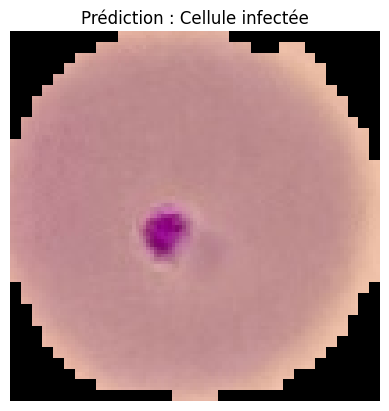

In [279]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def test_image(ind, images_f, images_f_2, model):
    
    plt.imshow(images_f[ind])
    
    image_test = images_f_2[ind]
    
    pred = model.predict(np.array([image_test]))
    if pred[0][0] < 0.5:
        result = "Cellule infectée"
        categorie = pred[0][0]
    else:
        resultat = "Cellule non infectée"
        categorie = 1 - pred[0][0]
    
    print(f"Prédiction : {resultat} (p = {categorie:.0f})")
    
    plt.title(f'Prédiction : {resultat} (p = {categorie:.0f})')
    plt.axis('off')
    plt.show()

img = cv2.imread('J:/Master/Semestre 2/Deep Learning/Projet/Examen_Deep_Learning_Master_Oct2023_DIT/cell_images/Parasitized/C33P1thinF_IMG_20150619_121435a_cell_173.png')
if img is None:
    print("Erreur lors du chargement de l'image.")
else:
    
    img_resized = cv2.resize(img, (64, 64))
    img_normalized = np.reshape(img_resized, [64, 64, 3]) / 255.0
    pred = model_cnn_data_augmentation.predict(np.array([img_normalized]))

    if pred[0][0] < 0.5:
        resultat = "Cellule infectée"
        categorie = pred[0][0]
    else:
        resultat = "Cellule non infectée"
        categorie = 1 - pred[0][0]


    print(f"Prédiction : {resultat} (Classe = {categorie:.0f})")
    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_display)
    plt.title(f'Prédiction : {resultat}')
    plt.axis('off')
    plt.show()

Question 5 :  Determiner les métriques d’évaluation et tracer la courbe de validation.

##### Courbe de validation du modèle CNN Basique

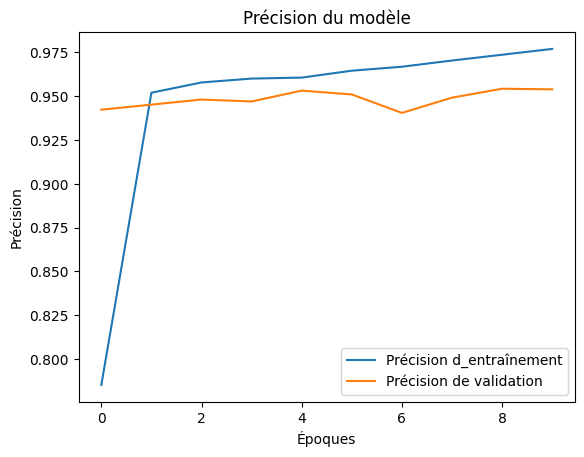

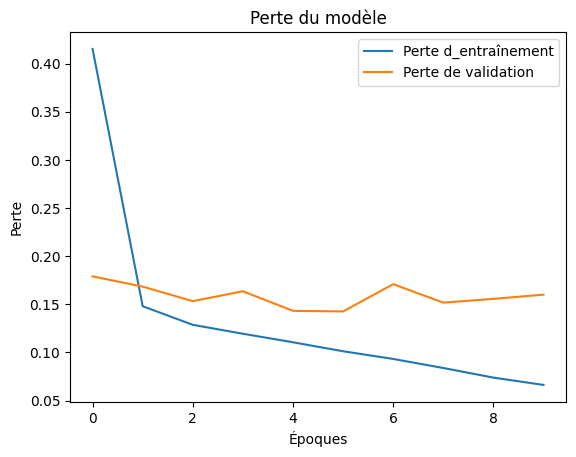

In [46]:
import matplotlib.pyplot as plt

# Tracer la précision
plt.plot(history_basique.history['accuracy'], label='Précision d_entraînement')
plt.plot(history_basique.history['val_accuracy'], label='Précision de validation')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()
# Tracer la perte
plt.plot(history_basique.history['loss'], label='Perte d_entraînement')
plt.plot(history_basique.history['val_loss'], label='Perte de validation')
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

##### Courbe de validation du modèle CNN avec Data Augmentation

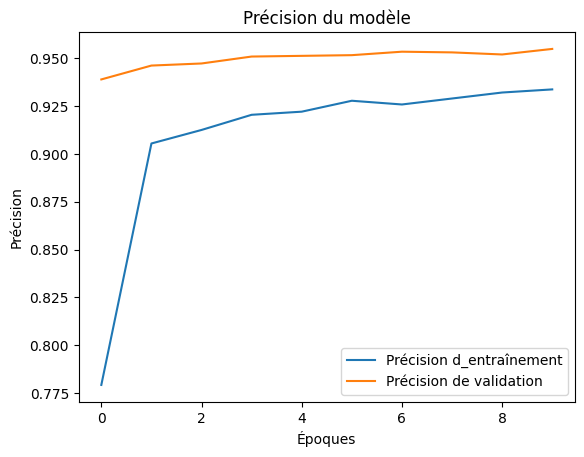

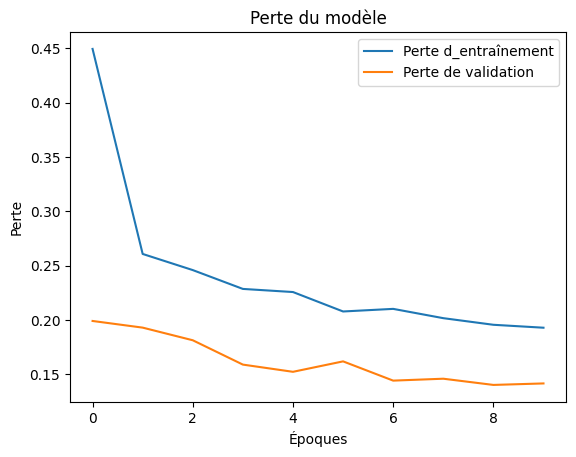

In [47]:
import matplotlib.pyplot as plt

# Tracer la précision
plt.plot(history_data_augmentation.history['accuracy'], label='Précision d_entraînement')
plt.plot(history_data_augmentation.history['val_accuracy'], label='Précision de validation')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Tracer la perte
plt.plot(history_data_augmentation.history['loss'], label='Perte d_entraînement')
plt.plot(history_data_augmentation.history['val_loss'], label='Perte de validation')
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

##### Courbe de validation du modèle CNN avec Dropout

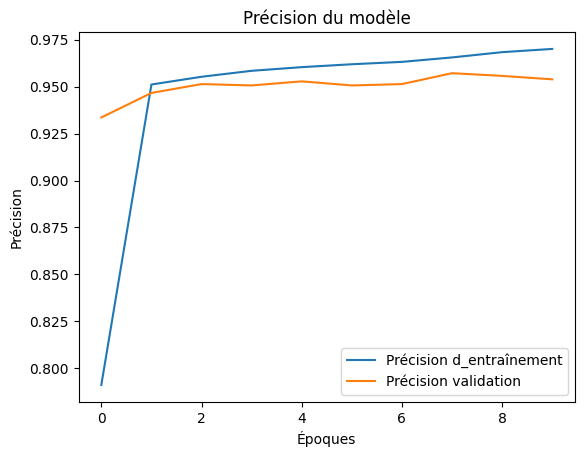

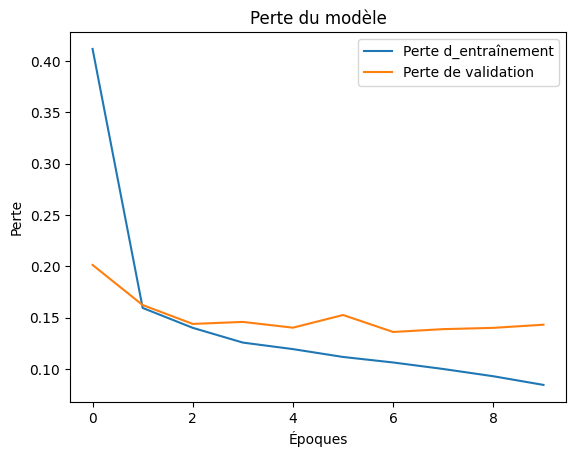

In [48]:
import matplotlib.pyplot as plt

# Tracer la précision
plt.plot(history_dropout.history['accuracy'], label='Précision d_entraînement')
plt.plot(history_dropout.history['val_accuracy'], label='Précision validation')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Tracer la perte
plt.plot(history_dropout.history['loss'], label='Perte d_entraînement')
plt.plot(history_dropout.history['val_loss'], label='Perte de validation')
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


##### Courbe de validation du modèle CNN avec Batch Normalization

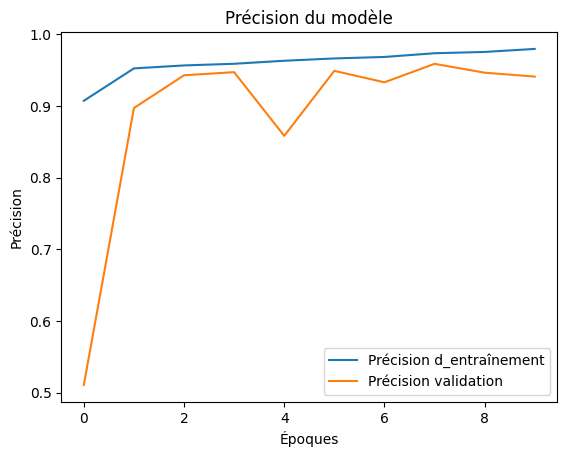

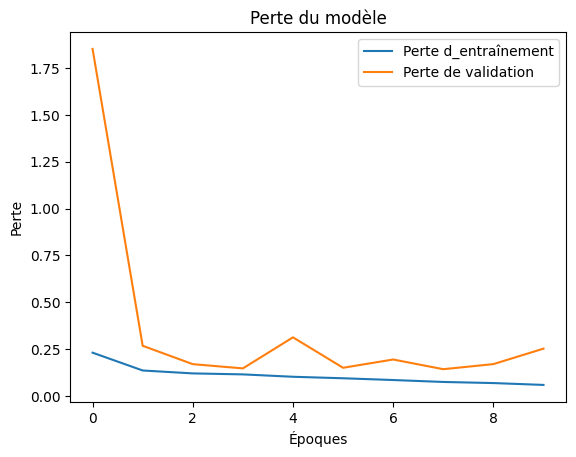

In [49]:
import matplotlib.pyplot as plt

# Tracer la précision
plt.plot(history_batch_normalization.history['accuracy'], label='Précision d_entraînement')
plt.plot(history_batch_normalization.history['val_accuracy'], label='Précision validation')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Tracer la perte
plt.plot(history_batch_normalization.history['loss'], label='Perte d_entraînement')
plt.plot(history_batch_normalization.history['val_loss'], label='Perte de validation')
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


# Exercice 2

#### Definition des constants

In [71]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

#### Prepation des données

In [72]:
filenames = os.listdir("J:/Master/Semestre 2/Deep Learning/Projet/Examen_Deep_Learning_Master_Oct2023_DIT/cats_dogs/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
    })

In [73]:
df.head()

,filename,category
0,cat.1.jpg,0
1,cat.10.jpg,0
2,cat.11.jpg,0
3,cat.12.jpg,0
4,cat.13.jpg,0


#### Voir la totalité des données

<Axes: xlabel='category'>

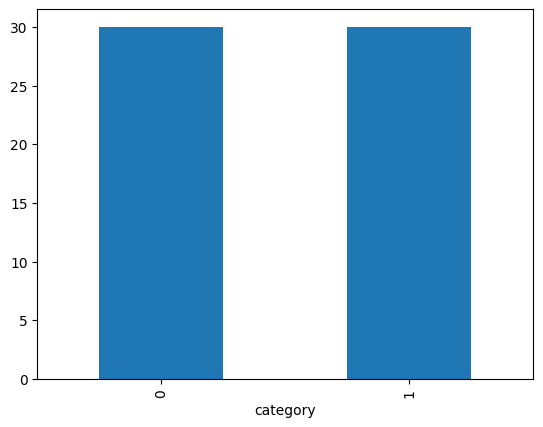

In [74]:
df['category'].value_counts().plot.bar()

#### Voir l'exemple d'image

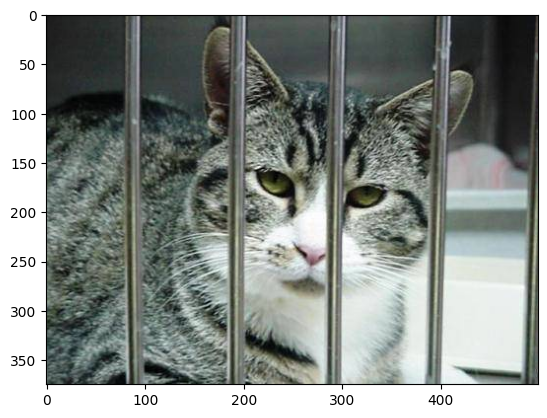

In [65]:
sample = random.choice(filenames)
image = load_img("J:/Master/Semestre 2/Deep Learning/Projet/Examen_Deep_Learning_Master_Oct2023_DIT/cats_dogs/" + sample)
plt.imshow(image)

# Création du modèle

Nous définissons l'architecture du CNN comme suit:
Soit une image de dimension IMAGE_SIZE
Une premiere couche composer de 32 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 70 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 128 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une couche de  sortie avec  fonction d'actvation softmax.

In [75]:
from tensorflow.keras import layers, models

# Définir l'architecture du CNN
model = models.Sequential()

# Première couche de convolution avec 32 filtres
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Deuxième couche de convolution avec 70 filtres
model.add(layers.Conv2D(70, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Troisième couche de convolution avec 128 filtres
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Quatrième couche de convolution avec 512 filtres
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Cinquième couche de convolution avec 512 filtres
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

# Couche de sortie avec softmax pour la classification des chiens et des chats (2 classes)
model.add(layers.Dense(2, activation='softmax'))

c:\Users\owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
# Implémenter votre code
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Compilation du modèle
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Questions

Question 1 : Quelle est le type de cette classification?

Le type de classification dans ce modèle est une classification binaire.  Car il classifie les images en deux catégories : chien (1) et chat (0).

Question 2 : Implémenter le réseau convolutif

In [88]:
# Encodage des étiquettes
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'})

In [98]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Séparer les données en ensemble d'entraînement et de validation
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Génération des lots d'images à partir du DataFrame
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "J:/Master/Semestre 2/Deep Learning/Projet/Examen_Deep_Learning_Master_Oct2023_DIT/cats_dogs/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=128
    )

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "J:/Master/Semestre 2/Deep Learning/Projet/Examen_Deep_Learning_Master_Oct2023_DIT/cats_dogs/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=128
)

Found 48 validated image filenames belonging to 2 classes.
Found 12 validated image filenames belonging to 2 classes.


In [101]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6250 - loss: 0.6599 - val_accuracy: 0.3333 - val_loss: 0.6646
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7292 - loss: 0.5666 - val_accuracy: 0.3333 - val_loss: 0.6641
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7500 - loss: 0.5411 - val_accuracy: 0.3333 - val_loss: 0.6664
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7292 - loss: 0.5254 - val_accuracy: 0.3333 - val_loss: 0.6770
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7708 - loss: 0.4911 - val_accuracy: 0.4167 - val_loss: 0.6702
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7292 - loss: 0.4749 - val_accuracy: 0.4167 - val_loss: 0.6893
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7917 - loss: 0.4400 - val_accuracy: 0.4167 - val_loss: 0.6728
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7083 - loss: 0.4551 - val_accuracy: 0.6667 - val_loss: 0.6205
Epoch 9/10
1/1 ━

In [102]:
# Évaluation dumodèle sur les données de validation
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Perte (loss) sur le jeu de validation : {loss}")
print(f"Précision (accuracy) sur le jeu de validation : {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.6667 - loss: 0.5854
Perte (loss) sur le jeu de validation : 0.5854051113128662
Précision (accuracy) sur le jeu de validation : 0.6666666865348816


#### Test du modèle

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


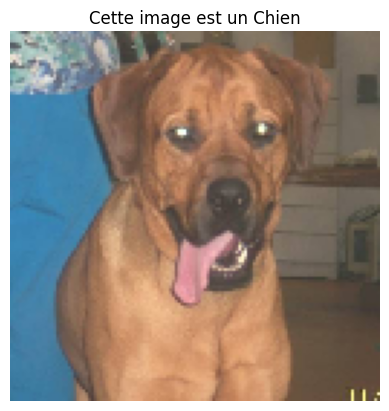

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Chargement de l'image
img_path = 'J:/Master/Semestre 2/Deep Learning/Projet/Examen_Deep_Learning_Master_Oct2023_DIT/cats_dogs/dog.30.jpg'
img = image.load_img(img_path, target_size=IMAGE_SIZE)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction)
class_labels = ['Chat', 'Chien']
result = class_labels[predicted_class]

# Affichage de l'image et du résultat
plt.imshow(img)
plt.axis('off')
plt.title(f"Cette image est un {result}")
plt.show()

Question 3 : Calculer le nombres de paramètres

In [132]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 61, 61, 70)     │        20,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 30, 30, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 30, 30, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 128)    │        80,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,112,274 (23.32 MB)

 Trainable params: 3,056,136 (11.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,056,138 (11.66 MB)

Question 4 : Quel rôle joue la méthode dropout dans un réseau de neurone convolitif

La méthode Dropout joue le rôle de régularisation des réseaux de neurones convolutifs c'est à dire la prévention du surapprentissage (ou overfitting).

# Exercice 3

Les réseaux de neurones convolutionnels classiques sont généralement composés d’une succession de couches de convolutions (avec ReLU) avec de plus en plus de filtres,  et dont la dimension spatiale est progressivement réduite par des couches de max pooling possiblement jusqu’à aggregation totale des dimensions spatiales,\
 il ne reste donc plus que la "profondeur" correspondant au nombre de filtres appliqués par la dernière convolution (1 × 1 × C).
 On y ajoute enfin généralement une ou quelques couches linéaires (appelées fully-connected).

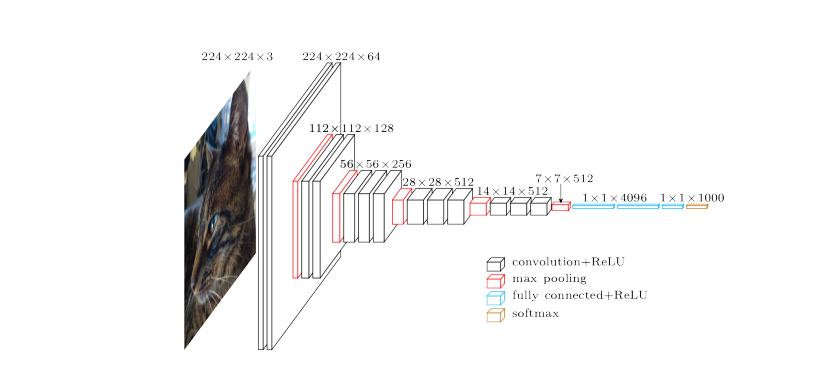

Considérant un seul filtre de convolution de padding p, de stride s et de taille de kernel k, pour une
entrée de taille x × y × z quelle sera la taille de sortie ?\
Combien y a-t-il de parametres à apprendre ?\
Combien de parametres aurait-il fallu apprendre si une couche fully-connected devait produire une sortie de
la même taille ?

Taille de sortie=(((x−k+2p)/s)+1)x(((y−k+2p/s)+1))×1\
Taille de sortie=(((32−3+2(1))/1)+1)x(((32−3+2(1))/1)+1)=32x32\
​Taille de sortie=1024

Le nombre de parametres à prendre en considérant un seul filtre est =k×k×z+1\
Nombre de parametres=3×3×3+1=28\
Nombre de parametres=28

Nombre de parametres qu'il aurait fallu=(32×32×3)×(32×32×1)\
Nombre de parametres=3072×1024\
Nombre de parametres=3 145 728

Quel interêt voyez-vous à l’usage du max pooling ?\
Le max pooling contribu à réduire la complexité du réseau, à rendre le modèle plus robuste et à améliorer la généralisation du modèle tout en empêchant le surapprentissage


Implementer ce réseau convolutif

In [139]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Exercice 4

Nous allons désormais implémenter notre premier réseau convolutionnel que nous allons appliquer à la
base de données CIFAR-10 (Krizhevsky, 2009, c.f. Figure 3). Cette base d’images RGB de 32×32 pixels
comporte 10 classes, 50k images en train et 10k images en test.


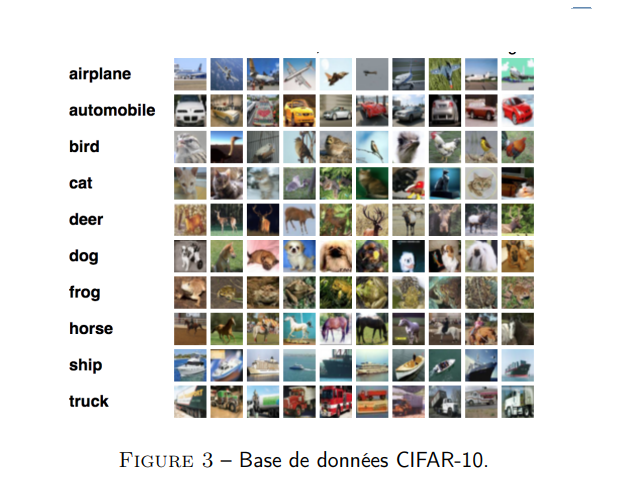

Le réseau que nous allons implémenter a un style proche de l’architecture AlexNet de Krizhevsky et al.\
(2012) adaptée à la base CIFAR-10 dont les images sont plus petites. Il sera composé des couches suivantes :\
— conv1 : 32 convolutions 5×5, suivie de ReLU \
— pool1 : max-pooling 2×2 \
— conv2 : 64 convolutions 5×5, suivie de ReLU \
— pool2 : max-pooling 2×2 \
— conv3 : 64 convolutions 5×5, suivie de ReLU \
— pool3 : max-pooling 2×2 \
— fc4 : fully-connected, 1000 neurones en sortie, suivie de ReLU \
— fc5 : fully-connected, 10 neurones en sortie, suivie de softmax

### Question

Implementer ce réseau convolutif

In [163]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Chargement des données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convertir les données en float32 et normaliser (entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding des labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Définir l'architecture du modèle
model = models.Sequential()

# conv1 : 32 convolutions 5×5, suivie de ReLU, padding='same'
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))

# pool1 : max-pooling 2×2
model.add(layers.MaxPooling2D((2, 2)))

# conv2 : 64 convolutions 5×5, suivie de ReLU, padding='same'
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# pool2 : max-pooling 2×2
model.add(layers.MaxPooling2D((2, 2)))

# conv3 : 64 convolutions 5×5, suivie de ReLU, padding='same'
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# pool3 : max-pooling 2×2 (réduit la taille à 4x4)
model.add(layers.MaxPooling2D((2, 2)))

# Vérifier la taille pour s'assurer que ce n'est pas trop petit
# Aplatissement des données avant d'ajouter les couches fully-connected
model.add(layers.Flatten())

# fc4 : fully-connected, 1000 neurones en sortie, suivie de ReLU
model.add(layers.Dense(1000, activation='relu'))

# fc5 : fully-connected, 10 neurones en sortie, suivie de softmax
model.add(layers.Dense(10, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [164]:
# Entraînement du modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 121ms/step - accuracy: 0.3731 - loss: 1.7028 - val_accuracy: 0.5893 - val_loss: 1.1595
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.6200 - loss: 1.0714 - val_accuracy: 0.6232 - val_loss: 1.0542
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 154ms/step - accuracy: 0.6956 - loss: 0.8596 - val_accuracy: 0.6961 - val_loss: 0.8633
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 168ms/step - accuracy: 0.7478 - loss: 0.7170 - val_accuracy: 0.7044 - val_loss: 0.8590
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 169ms/step - accuracy: 0.7921 - loss: 0.5888 - val_accuracy: 0.7106 - val_loss: 0.8519
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 159ms/step - accuracy: 0.8366 - loss: 0.4703 - val_accuracy: 0.7016 - val_loss: 0.9140
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 154ms/step - accuracy: 0.8689 - loss: 0.3745 - val_accuracy: 0.7190 - val_loss: 0.9226
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.9054 -

In [169]:
# Évaluation du modèle sur les données de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Valeur du loss : {test_loss}")
print(f"Précision du modèle : {test_acc*100} %")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7238 - loss: 1.2482
Valeur du loss : 1.2461802959442139
Précision du modèle : 72.39999771118164 %


In [170]:
# Faire des prédictions sur les données de validation
predictions = model.predict(x_test)

# Extraire les classes prédites
predicted_classes = tf.argmax(predictions, axis=1)

# Afficher quelques prédictions avec leurs vraies étiquettes
for i in range(5):
    print(f"Image {i+1} : Prédiction = {predicted_classes[i]}, Vérité terrain = {tf.argmax(y_test[i])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step
Image 1 : Prédiction = 3, Vérité terrain = 3
Image 2 : Prédiction = 8, Vérité terrain = 8
Image 3 : Prédiction = 8, Vérité terrain = 8
Image 4 : Prédiction = 0, Vérité terrain = 0
Image 5 : Prédiction = 6, Vérité terrain = 6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


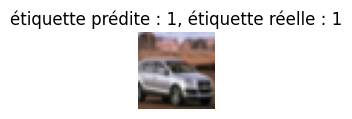

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Choix d'une image aléatoire
indice_alea = np.random.randint(len(x_test))
image_alea = x_test[indice_alea]
etiquette_image_alea = y_test[indice_alea]

image_predict = np.expand_dims(image_alea, axis=0)

prediction = model.predict(image_predict)

etiquette_predit = np.argmax(prediction)

# Convertir la vérité terrain en classe réelle
etiquette_reelle = np.argmax(etiquette_image_alea)

plt.figure(figsize=(1, 1))
plt.imshow((image_alea * 255).astype('uint8'))
plt.title(f"étiquette prédite : {etiquette_predit}, étiquette réelle : {etiquette_reelle}")
plt.axis('off')
plt.show()

Pour chaque couche, indiquer la taille de sortie et le nombre de poids à apprendre. \
Commentez cette répartition.\
Quel est donc le nombre total de poids à apprendre\
Comparer cela au nombre d’exemples

Pour conserver en sortie les mêmes dimensions spatiales qu’en entrée, nous choisirons "same" comme valeur de padding et 1 comme valeur de stride

Pour les max poolings, on veut réduire les dimensions spatiales d’un facteur 2, nous choisirons "valid" comme valeur de padding et 2 comme valeur de stride